In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

In [2]:
Hex15diene = """  
  C    0.0000000    0.1445338   -3.0858378
  C    0.0000000   -0.4150271   -1.8737054
  C    0.0000000    0.4335716   -0.6314643
  C    0.0000000   -0.4335716    0.6314643
  C    0.0000000    0.4150271    1.8737054
  C    0.0000000   -0.1445338    3.0858378
  H    0.0000000   -0.4804487   -3.9729815
  H    0.0000000    1.2242504   -3.2023136
  H    0.0000000   -1.4992548   -1.7967351
  H   -0.9055102    1.0796952   -0.6351111
  H    0.9055102    1.0796952   -0.6351111
  H    0.9055102   -1.0796952    0.6351111
  H   -0.9055102   -1.0796952    0.6351111
  H    0.0000000    1.4992548    1.7967351
  H    0.0000000   -1.2242504    3.2023136
  H    0.0000000    0.4804487    3.9729815
  """
# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Hex15diene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

[[-3.0858378  0.1445338]
 [-1.8737054 -0.4150271]
 [-0.6314643  0.4335716]
 [ 0.6314643 -0.4335716]
 [ 1.8737054  0.4150271]
 [ 3.0858378 -0.1445338]]


In [3]:
hex15diene_molecule = gto.M(atom=Hex15diene, basis='sto-3g')#'sto-6g''ccpvdz'

px_indices = pts.taking_indices(hex15diene_molecule, ['C 2px'])
print(px_indices)
hf = scf.RHF(hex15diene_molecule)
hf_energy = hf.kernel()

[2, 7, 12, 17, 22, 27]
converged SCF energy = -230.160671581829


In [4]:
indices_valence_orbitals = [i for i, label in enumerate(hex15diene_molecule.ao_labels()) if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
valence_orbitals = [label for label in hex15diene_molecule.ao_labels() if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
px_indices_full = [i for i, label in enumerate(valence_orbitals) if ('C 2px') in label]
print(hex15diene_molecule.ao_labels())
print(indices_valence_orbitals)
print(valence_orbitals)
print(alg_valence_orbitals)
print(px_indices_full)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ', '14 H 1s    ', '15 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
['0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 2s    ', '5 C 2px 

In [5]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [6]:
n = len(indices_valence_orbitals)
print(n)
H_full = np.zeros((n,n))

for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    H_full[i, i] = -alpha 
print(H_full)

S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            H_full[i, j] = H_full[j, i] = K*S_full[i,j]*(H_full[i,i]+H_full[j,j])/2
print(H_full)

34
[[-21.4   0.    0.  ...   0.    0.    0. ]
 [  0.  -11.4   0.  ...   0.    0.    0. ]
 [  0.    0.  -11.4 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... -13.6   0.    0. ]
 [  0.    0.    0.  ...   0.  -13.6   0. ]
 [  0.    0.    0.  ...   0.    0.  -13.6]]
[[-2.14000000e+01 -0.00000000e+00  8.86188813e-16 ... -1.43754368e-03
  -6.45824241e-06 -3.47488104e-07]
 [-0.00000000e+00 -1.14000000e+01 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 8.86188813e-16 -0.00000000e+00 -1.14000000e+01 ... -6.07846256e-04
   2.72328574e-06 -3.59223760e-08]
 ...
 [-1.43754368e-03 -0.00000000e+00 -6.07846256e-04 ... -1.36000000e+01
  -3.78683485e-01 -1.41078249e+00]
 [-6.45824241e-06 -0.00000000e+00  2.72328574e-06 ... -3.78683485e-01
  -1.36000000e+01 -3.49460144e+00]
 [-3.47488104e-07 -0.00000000e+00 -3.59223760e-08 ... -1.41078249e+00
  -3.49460144e+00 -1.36000000e+01]]


In [7]:
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
ASA = A@S_full@A
H_p = A @ H_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_px = C[px_indices_full,:]
print(C_px.round(3))

[-28.05996926 -26.92485794 -24.61785737 -21.79860161 -19.47923304
 -19.42465467 -16.05510612 -15.90878553 -15.76553279 -14.78396608
 -14.7718288  -14.62037709 -14.23785668 -13.95986766 -13.15047846
 -12.79578377 -12.76024217  -8.62100852  -8.49625822  -0.18950443
   0.42241009   1.68389931   1.89871857   4.68560016   5.49884133
   5.6215258    7.83161808   8.10391935  12.74256396  12.77477257
  17.77159699  27.43140859  36.47100455  36.54880667]
[[ 0.    -0.     0.    -0.     0.    -0.    -0.052  0.     0.    -0.
   0.109 -0.     0.     0.     0.    -0.52   0.497  0.48   0.472 -0.
  -0.     0.     0.028  0.03  -0.     0.     0.    -0.     0.    -0.
  -0.    -0.     0.    -0.   ]
 [-0.    -0.     0.     0.     0.    -0.    -0.149  0.     0.     0.
   0.203 -0.     0.     0.     0.    -0.448  0.428 -0.504 -0.513  0.
   0.    -0.    -0.069 -0.088  0.    -0.     0.     0.     0.     0.
   0.    -0.     0.     0.   ]
 [-0.     0.    -0.     0.     0.     0.    -0.47   0.     0.     0.
   0.

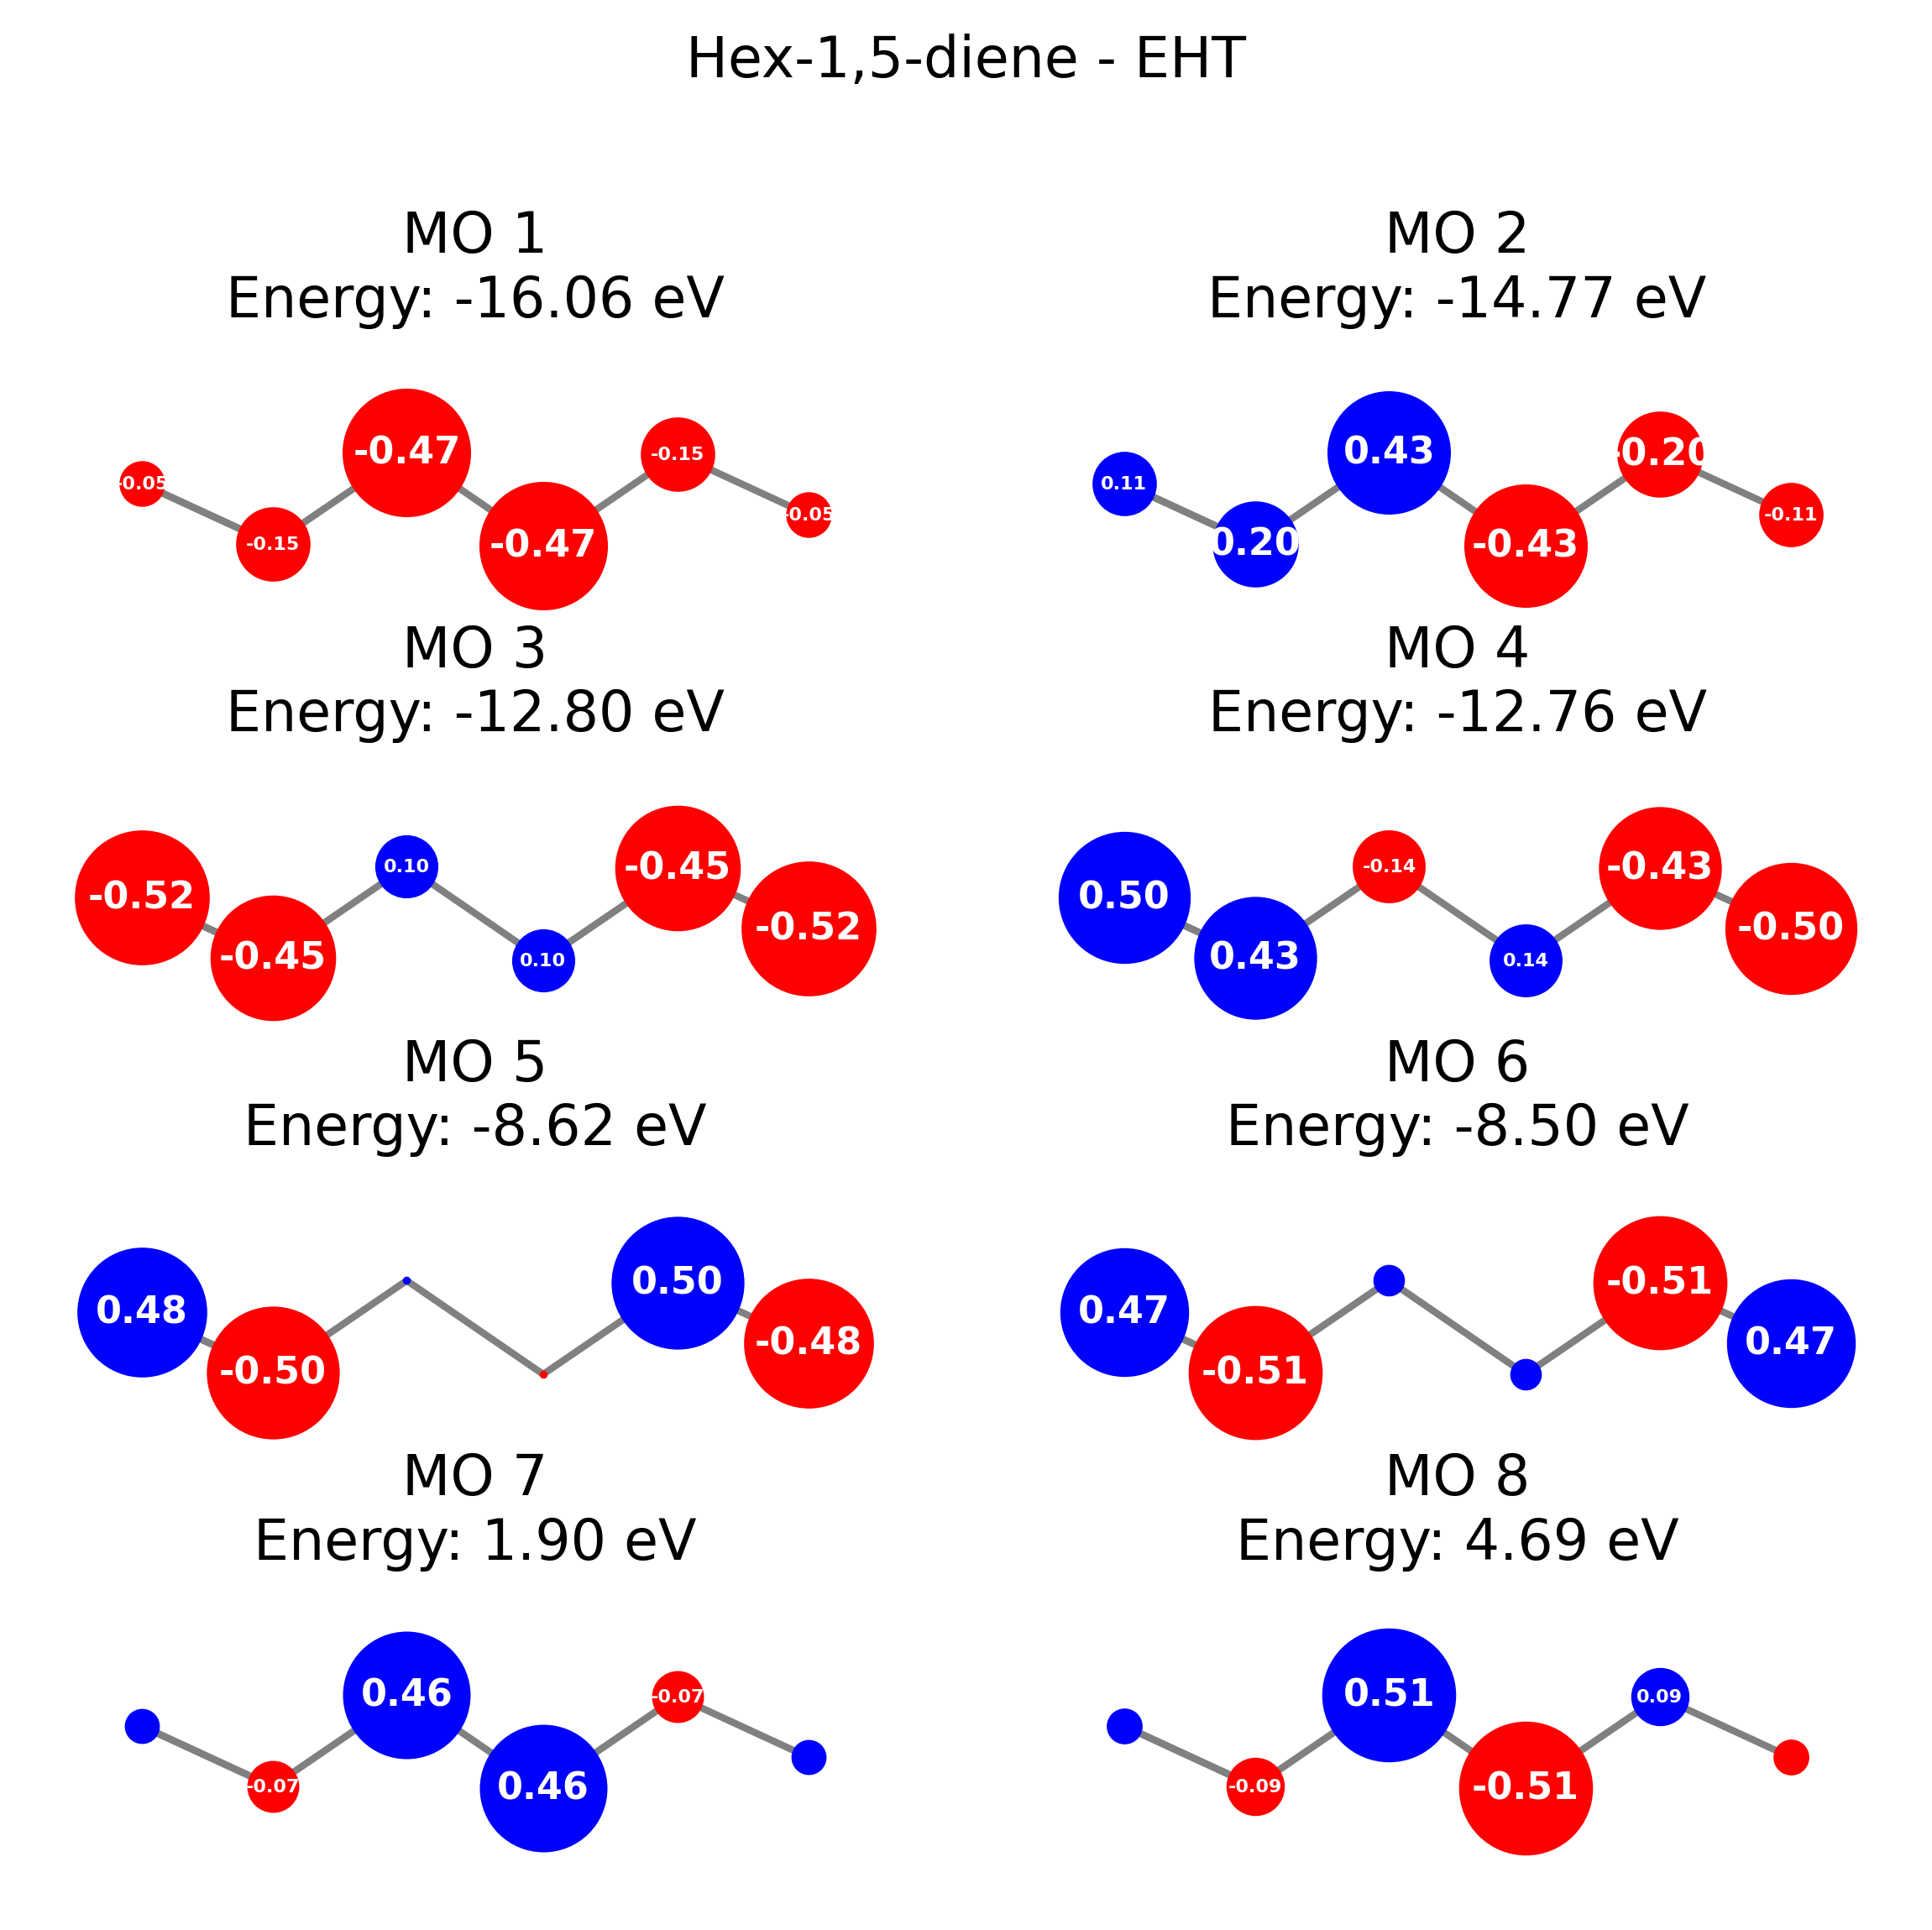

In [8]:
pts.plot_MOs(eigenvalues_full[[6,10,15,16,17,18,22,23]], C_px[:, [6,10,15,16,17,18,22,23]], coordinates, [(0,1)], 'Hex-1,5-diene', 'EHT', (6,6))

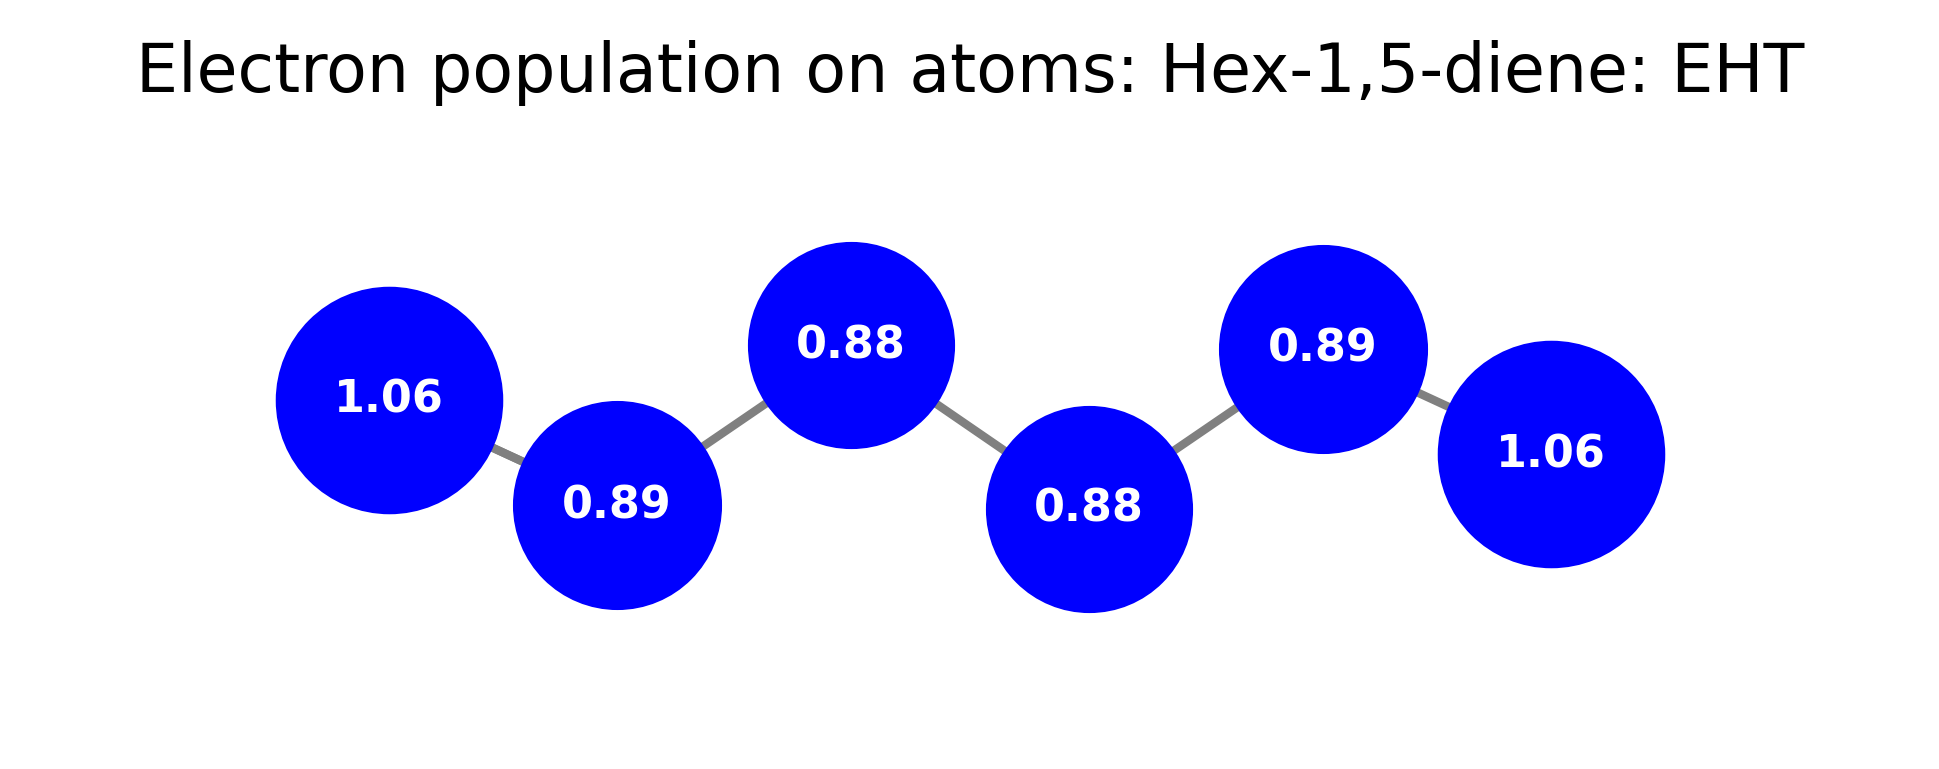

In [11]:
D_eht = pts.making_D(C_px[:, [6,10,15,16,17,18,22,23]], 8)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_eht, 'Hex-1,5-diene', 'EHT', (6,2))

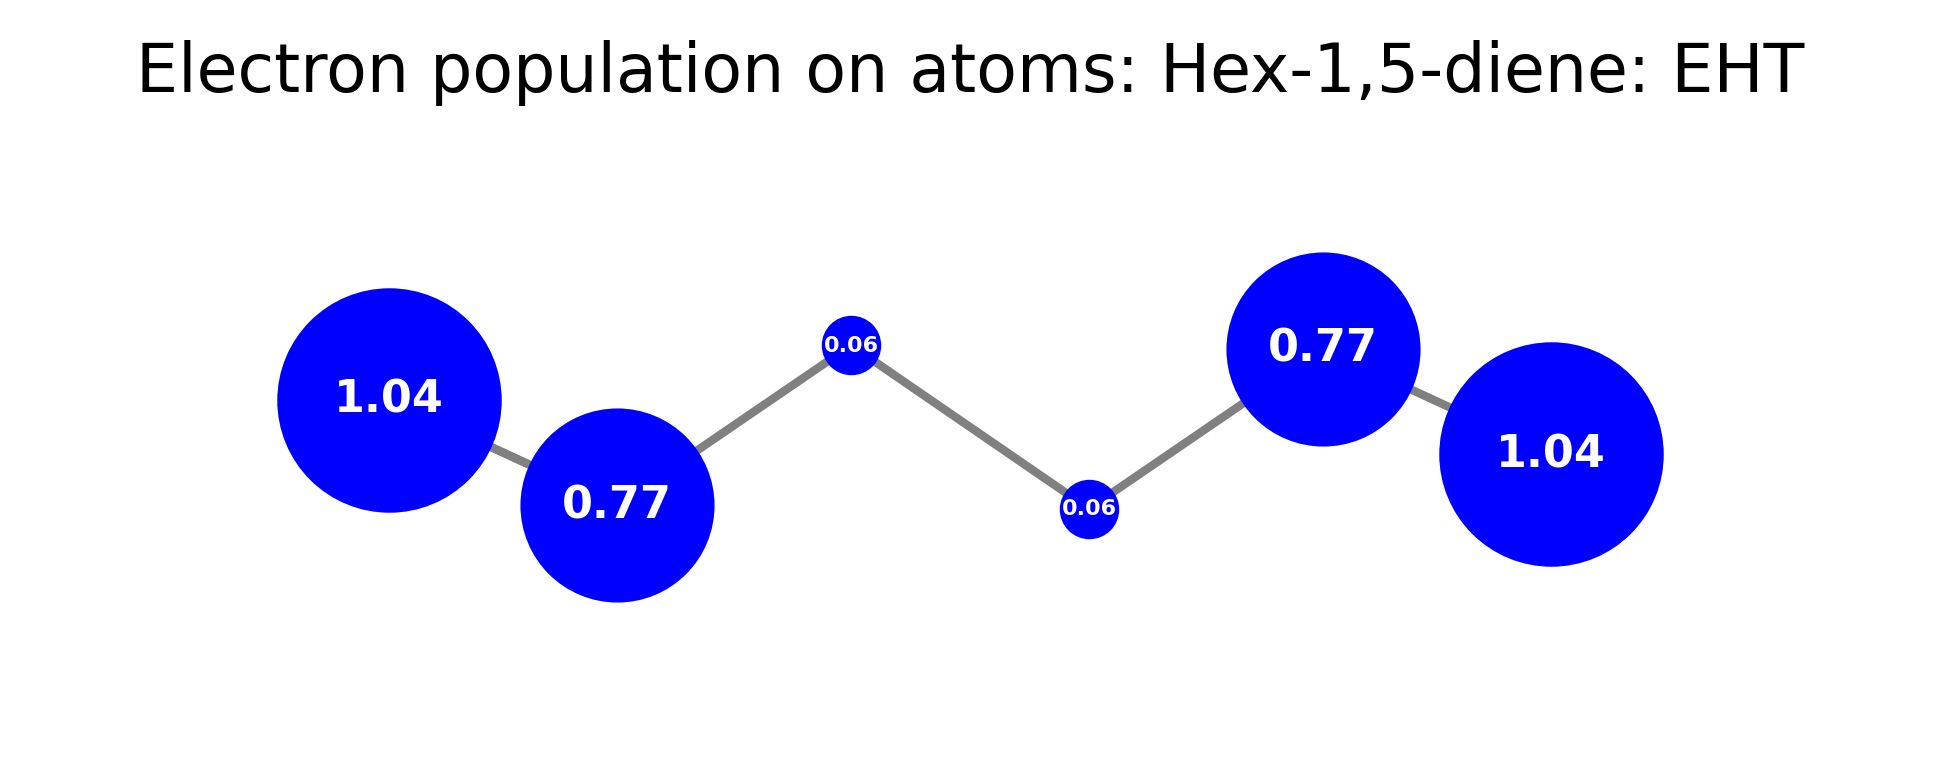

In [10]:
px_orbitals_pi = C[px_indices_full][:, [15,16,17,18]]
D_rhf_pi = pts.making_D(px_orbitals_pi, 4)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_rhf_pi, 'Hex-1,5-diene', 'EHT', (6,2))